### Import Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import os

path  = 'image_data'
files = os.listdir(path)
print(files)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [3]:
classes = {'A':'A', 'B':'B', 'C':'C', 'D':'D', 'E':'E', 'F':'F', 'G':'G', 'H':'H', 
           'I':'I', 'J':'J', 'K':'K', 'L':'L', 'M':'M', 'N':'N', 'O':'O', 'P':'P', 'Q':'Q', 
           'R':'R', 'S':'S', 'T':'T', 'U':'U', 'V':'V', 'W':'W', 'X':'X', 'Y':'Y', 'Z':'Z'}

In [5]:
X = []
Y = []

for cl in classes:
    pth=path+'/'+cl
    for img_name in os.listdir(pth):
        img = image.imread(pth+'/'+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print('Dataset created successfully!')

Dataset created successfully!


In [8]:
len(X)

372451

### Converting list to numpy array

In [11]:
X = np.array(X)
Y = np.array(Y)
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


L


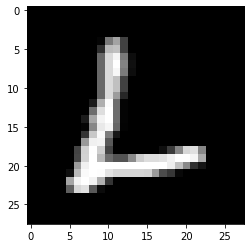

In [37]:
plt.imshow(X[100000],cmap='gray')
print(Y[100000])

### Preparing data

In [22]:
X.shape

(372451, 28, 28)

In [23]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(372451, 784)
(372451,)


In [24]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(372451, 28, 28)
3
2


In [25]:
df=pd.DataFrame(X_new)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df = df.add_prefix("pixel_")
df.head(5)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.to_csv('image.csv',index=False)

In [32]:
data['label'] = Y

In [33]:
data.head(5)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [38]:
data.to_csv('Image.csv',index=False)

In [2]:
dt = pd.read_csv('D:\\image.csv')
dt.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [3]:
# Shape of the dataframe -->

dt.shape

(372451, 785)

In [4]:
# Frequecy of labels

dt.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

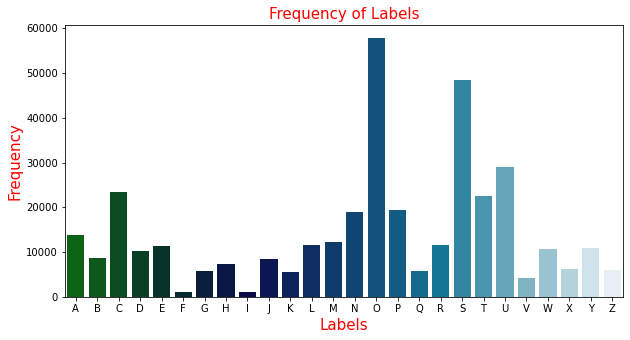

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(data=dt, x='label',palette='ocean')
plt.xlabel('Labels',fontsize=15,color='r')   
plt.ylabel('Frequency',fontsize=15,color='r')
plt.title('Frequency of Labels',fontsize=15,color='r')
plt.show()

In [5]:
x = dt.drop('label', axis=1)

y = dt['label']

### Test - Train Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(279338, 784) (279338,)
(93113, 784) (93113,)


## Building the Model

## 1. Logistic Regression

### Training the data

In [10]:
%%time

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

S:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 4min 39s
Wall time: 4min 2s


LogisticRegression()

### Prediction

In [11]:
%%time
y_test_pred = classifier.predict(X_test)

CPU times: total: 1.25 s
Wall time: 1.79 s


In [12]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
186272,O,O
315826,U,U
63893,E,E
264949,S,S
224093,R,R


### Measuring Performance

In [13]:
print('Accuracy :', metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8793079376671357


## 2. Decision Tree Model

### Training the data

In [9]:
%%time

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

CPU times: total: 2min 46s
Wall time: 3min 9s


DecisionTreeClassifier()

### Prediction

In [11]:
%%time
y_test_pred = dtc.predict(X_test)

CPU times: total: 812 ms
Wall time: 1.01 s


In [59]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
186272,O,O
315826,U,U
63893,E,E
264949,S,S
224093,R,R


### Measuring Performance

In [60]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.9479771890069056


In [10]:
# Serialization & Deserialization

import pickle
pickle.dump(dtc,open('model_dt.pkl','wb'))
model_dt=pickle.load(open('model_dt.pkl','rb'))

## 3. Random Forest Classifier

### Training the data

In [8]:
%%time

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

CPU times: total: 6min 59s
Wall time: 7min 25s


RandomForestClassifier()

### Prediction

In [9]:
%%time
y_test_pred = rf.predict(X_test)

CPU times: total: 9.56 s
Wall time: 9.83 s


In [10]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
186272,O,O
315826,U,U
63893,E,E
264949,S,S
224093,R,R


### Measuring Performance

In [11]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.9861888243317259


In [7]:
# Serialization & Deserialization

import pickle
pickle.dump(rf,open('model_rf.pkl','wb'))
model_rf=pickle.load(open('model_rf.pkl','rb'))

## 4. AdaBoost

### Training the data

In [22]:
%%time

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

CPU times: total: 8min 36s
Wall time: 8min 39s


AdaBoostClassifier()

### Prediction

In [23]:
%%time
y_test_pred = adaboost_classifier.predict(X_test)

CPU times: total: 22.7 s
Wall time: 23 s


In [24]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
186272,O,O
315826,U,J
63893,E,B
264949,S,S
224093,R,R


### Measuring Performance

In [25]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.580660058208843


## 5. Naive Bayes

### Training the data

In [29]:
%%time

gnb = GaussianNB()
gnb.fit(X_train, y_train)

CPU times: total: 9.92 s
Wall time: 10.1 s


GaussianNB()

### Prediction

In [30]:
%%time
y_test_pred = gnb.predict(X_test)

CPU times: total: 28.7 s
Wall time: 28.9 s


In [31]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
186272,O,O
315826,U,V
63893,E,Z
264949,S,S
224093,R,H


### Measuring Performance

In [32]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.559535188426965


## Summary

In [129]:
dataframe = {'Algorithm':['Logistic Regression','Decision Tree','Random Forest','AdaBoost','Naive Bayes'],
          'Training Time':['4min 39s','2min 35s','6min 57s','8min 36s','9.92 s'],
          'PredictionTime':['1.25 s','469 ms','9.67 s','22.7 s','28.7 s'],
          'Accuracy':[0.87,0.94,0.98,0.58,0.55]}

summary = pd.DataFrame(dataframe,index=[1,2,3,4,5])
summary

,Algorithm,Training Time,PredictionTime,Accuracy
1,Logistic Regression,4min 39s,1.25 s,0.87
2,Decision Tree,2min 35s,469 ms,0.94
3,Random Forest,6min 57s,9.67 s,0.98
4,AdaBoost,8min 36s,22.7 s,0.58
5,Naive Bayes,9.92 s,28.7 s,0.55


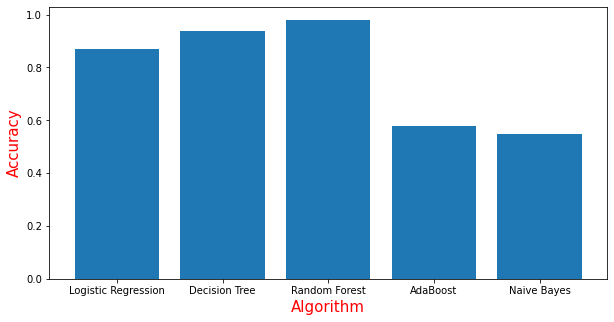

In [139]:
algo=['Logistic Regression','Decision Tree','Random Forest','AdaBoost','Naive Bayes']
accur=[0.87,0.94,0.98,0.58,0.55]
plt.figure(figsize=(10,5))

plt.xlabel('Algorithm',fontsize=15,color='r')   
plt.ylabel('Accuracy',fontsize=15,color='r')

plt.bar(algo,accur)
plt.show()

### Conclusion

- From the above model it has been seen that Random Forest has achieved highest accuracy with 98% and Decision Tree is 94%.
- It is also seen that the prediction time in Decision Tree is more among other algorithms, which is 469 ms.

### Model Testing

In [2]:
import gradio as gr

In [8]:
def predict_image(img):
    img_3d=img.reshape(-1,28,28)
    im_resize=img_3d.reshape(1,784)
    prediction=model_rf.predict(im_resize)
    pred=(prediction.reshape(1)[0])
    return pred

In [9]:
iface=gr.Interface(predict_image,inputs="sketchpad",outputs="label")

In [10]:
iface.launch(debug="True")

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


S:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
